## Figures

- Figure 2F
- Figure 6 A,B,C,D
- Figure ST1 A,B,C

## Required files

`chexmix_output_dir = Path("../../chipnexus/comparison/output/chexmix/")`

- `{chexmix_output_dir}/{tf}/intermediate-results/{tf}.experiment.transfac`
- `{chexmix_output_dir}/pwm_instances.stacked_seqlets.pkl`
- `{chexmix_output_dir}/pwm_instances.csv.gz`
- `{chexmix_output_dir}/chexmix.stacked_seqlets.pkl`
- `{chexmix_output_dir}/chexmix.csv.gz`


## Produced files

`fdir = Path(f'{ddir}/figures/method-comparison')`

- Figure ST1 A
  - `{fdir}/ChExMix.motifs.pdf`
- Figure ST1 B
  - `{fdir}/profile-score.hist.pdf`
- Figure ST1 C
  - `{fdir}/footprint-recall-curve.with-ChExMix.pdf`
- Figure 2 F
  - `{fdir}/profile-max-correlation.bar.pdf`
- Figure 6A
  - `{fdir}/Nanog<>Nanog.BPNet.default.pdf`
- Figure 6B
  - `{fdir}/Nanog<>Nanog.PWM.threshold=6.pdf`
- Figure 6C
  - `{fdir}/Nanog<>Nanog.ChExMix.default.pdf`
- Figure 6D
  - `{fdir}/spacing/{motif_pair}.{strand_combination}.{dist}.pwm+profile.pdf`

In [1]:
from collections import OrderedDict
exp = 'nexus,peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE'
imp_score = 'profile/wn'

motifs = OrderedDict([
    ("Oct4-Sox2", 'Oct4/m0_p0'),
    ("Sox2", 'Sox2/m0_p1'),
    ("Nanog", 'Nanog/m0_p1'),
    ("Klf4", 'Klf4/m0_p0'),
])

motifs_chexmix = OrderedDict([
    ("Oct4-Sox2", 'Oct4/1'),
    ("Sox2", 'Sox2/1'),
    ("Nanog", 'Nanog/1'),
    ("Klf4", 'Klf4/1'),
])

main_motifs = ['Oct4-Sox2', 'Sox2', 'Nanog', 'Klf4']

In [4]:
# Imports
from basepair.imports import *
from basepair.exp.paper.config import tasks
from basepair.modisco.pattern_instances import load_instances, filter_nonoverlapping_intervals, plot_coocurence_matrix, dfi_filter_valid, dfi_add_ranges, annotate_profile
from basepair.cli.imp_score import ImpScoreFile
from basepair.modisco.core import Pattern
from basepair.preproc import dfint_no_intersection
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
paper_config()

interval_cols = ['example_chrom', 'pattern_start_abs', 'pattern_end_abs']

In [5]:
from basepair.exp.paper.config import models_dir

In [6]:
!mkdir -p {ddir}/figures/method-comparison

In [9]:
# figures dir
ddir = get_data_dir()
model_dir = models_dir / exp
fdir = Path(f'{ddir}/figures/method-comparison')

In [10]:
profile_width = 70
seqlen = 1000

In [ ]:
from basepair.modisco.pattern_instances import (multiple_load_instances, load_instances, filter_nonoverlapping_intervals, 
                                                plot_coocurence_matrix, align_instance_center, dfi2seqlets, annotate_profile)

In [ ]:
mr = MultipleModiscoResult({t: model_dir / f'deeplift/{t}/out/{imp_score}/modisco.h5'
                           for t in tasks})

In [ ]:
# Exclude TEs
def shorten_te_pattern(s):
    tf, p = s.split("/", 1)
    return tf + "/" + shorten_pattern(p)

### ChExMix motifs

In [ ]:
from basepair.utils import flatten

In [ ]:
from basepair.utils import pd_first_cols, flatten
from basepair.exp.chipnexus.comparison import read_peakxus_dfi, read_chexmix_dfi, read_fimo_dfi, read_meme_motifs, read_transfac

In [ ]:
comparison_dir = Path('../../chipnexus/comparison/output')

In [ ]:
chexmix_motifs = flatten({tf: read_transfac(comparison_dir / f"chexmix/{tf}/intermediate-results/{tf}.experiment.transfac")
                          for tf in tasks}, separator='/')
chexmix_patterns = [Pattern('chexmix/' + k, v.pwm, dict(), dict()) 
                    for k,v in chexmix_motifs.items()]

In [ ]:
from basepair.plot.utils import seqlogo_clean

In [ ]:
import matplotlib as mpl

In [ ]:
list(map(len, chexmix_patterns))

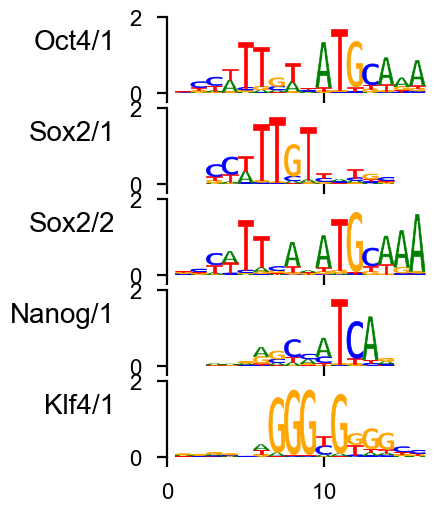

In [315]:
p = chexmix_patterns[0]
from concise.utils.plot import seqlogo

fig, axes = plt.subplots(len(chexmix_patterns), 1, 
                         sharex=True, sharey=True,
                         figsize=get_figsize(.25, len(chexmix_patterns)/3))
for i, p in enumerate(chexmix_patterns):
    pwm = p.resize(16).get_seq_ic()
    ax = axes[i]
    seqlogo(pwm, ax=axes[i])
    # p.resize(16).plot('seq_ic', letter_width=.1, height=0.5);
    ax.xaxis.set_major_locator(mpl.ticker.AutoLocator())
    _, tf, n = p.name.split("/")
    ax.set_ylabel(f"{tf}/{n}", rotation=0,
                  multialignment='center',
                  ha='right', labelpad=5)
    ax.set_ylim([0, 2])
    sns.despine(bottom=True, top=True, right=True)
fig.savefig(fdir / 'ChExMix.motifs.pdf')

### Considered motifs

TF-MoDISco is using the TensorFlow backend.


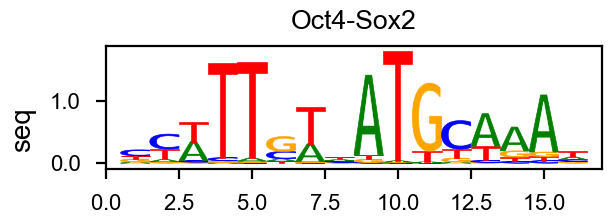

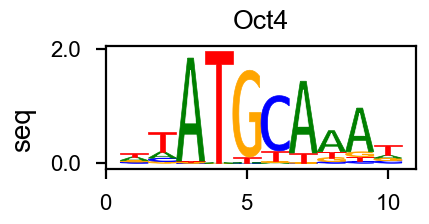

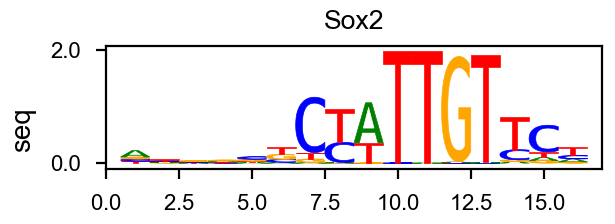

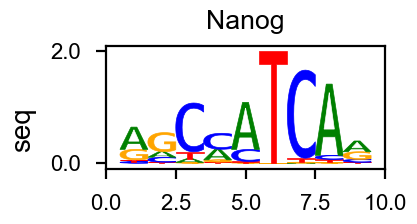

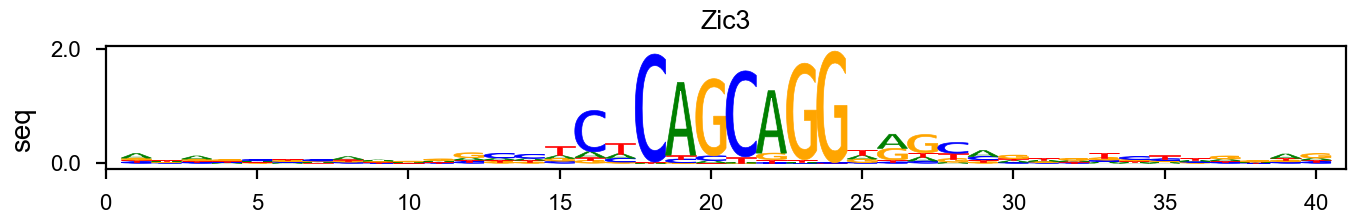

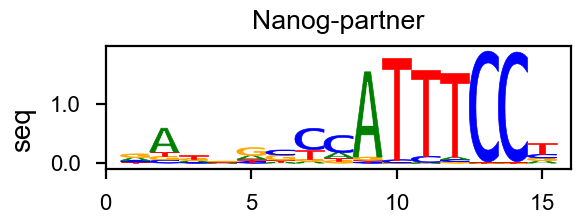

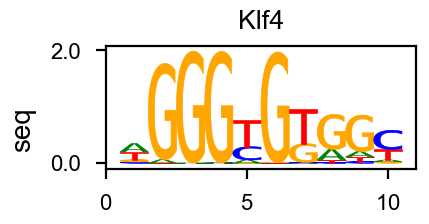

In [13]:
# plot them
patterns = {m: mr.get_pattern(longer_pattern(p)).trim_seq_ic(0.08)
            for m, p in motifs.items()}
for tf, p in patterns.items():
    p.plot("seq");
    plt.title(tf)

In [35]:
len(dfi_chexmix)

169377

## Annotate dfi and 

#### Load

In [7]:
# Store the results
chexmix_output_dir = Path("../../chipnexus/comparison/output/chexmix/")

In [8]:
# Load the cached results
%time p_seq = read_pkl(chexmix_output_dir / 'pwm_instances.stacked_seqlets.pkl')
%time dfi_seq = pd.read_csv(chexmix_output_dir / 'pwm_instances.csv.gz')

CPU times: user 58 s, sys: 47.8 s, total: 1min 45s
Wall time: 3min 18s
CPU times: user 58.7 s, sys: 5.15 s, total: 1min 3s
Wall time: 57.8 s


In [9]:
# Load the cached results
%time ps_chexmix_motifs = read_pkl(chexmix_output_dir / 'chexmix.stacked_seqlets.pkl')
%time dfi_chexmix = pd.read_csv(chexmix_output_dir / 'chexmix.csv.gz')

CPU times: user 3.14 s, sys: 1.26 s, total: 4.41 s
Wall time: 5.64 s
CPU times: user 2.62 s, sys: 92 ms, total: 2.71 s
Wall time: 2.79 s


In [10]:
!mv {chexmix_output_dir}/benchmark/instances.stacked_seqlets.pkl {model_dir}/benchmark/instances.stacked_seqlets.pkl

mv: cannot stat '../../chipnexus/comparison/output/chexmix/benchmark/instances.stacked_seqlets.pkl': No such file or directory


In [11]:
ls -latr {model_dir}/benchmark

total 12305656
-rw-rw-r-- 1 avsec oak_akundaje 12138112499 Apr 15 11:40 instances.stacked_seqlets.pkl
-rw-rw---- 1 avsec oak_akundaje   462846104 Apr 16 07:06 instances.csv.gz
drwxrws--- 2 avsec oak_akundaje        4096 Apr 16 09:44 ./
drwxrws--- 8 avsec oak_akundaje        4096 May  3 14:15 ../


In [12]:
# Load the cached results
%time ps_motifs = read_pkl(model_dir / 'benchmark/instances.stacked_seqlets.pkl')
%time dfis = pd.read_csv(model_dir / 'benchmark/instances.csv.gz')

CPU times: user 35.2 s, sys: 23.4 s, total: 58.5 s
Wall time: 4min 12s
CPU times: user 41.8 s, sys: 2.11 s, total: 43.9 s
Wall time: 36.6 s


In [13]:
!du -sh {output_dir}/*

du: cannot access '{output_dir}/*': No such file or directory


In [14]:
def profile_metrics(profiles, target_profile, dist_metrics=['cosine']):
    """
    
    Args:
      profiles: np.array of a profile
      target_profile: aggregated profile
    """
    from scipy.spatial.distance import cdist
    from basepair.stats import symmetric_kl
    # total counts
    total_counts = profiles.sum(axis=(1,2))
    
    # value at the maximum position
    max_positions = np.argmax(target_profile, axis=0)
    max_counts = profiles[:, max_positions, [0, 1]].sum(axis=-1)
    
    # cosine distance
    Xa = profiles.reshape((len(profiles), -1))
    Xb = target_profile[np.newaxis].reshape((1, -1))
    cosine = cdist(Xa + 1e-6, Xb + 1e-6, metric='cosine')  # cosine distance
    sym_kl = symmetric_kl(Xa.T + 1e-6, Xb.T + 1e-6)  # Make sure we don't have 0 values
    # KL divergence

    assert cosine.ndim == 2
    assert cosine.shape[1] == 1
    return pd.DataFrame({
        "counts": total_counts,
        "max": max_counts,
        "sym_kl": sym_kl,
        "cosine": cosine[:, 0]
    })

In [15]:
from basepair.exp.paper.config import profile_mapping

In [16]:
dfis['imp_weighted_cat'] = pd.Categorical(dfis['imp_weighted_cat'].astype(str), categories = ['low', 'medium', 'high'], ordered=True)

In [17]:
dfis.head()

,example_chrom,example_end,example_idx,example_interval_from_task,example_start,example_strand,imp/Klf4,imp/Nanog,imp/Oct4,imp/Sox2,imp_max,imp_max_task,imp_weighted,imp_weighted_cat,imp_weighted_p,match/Klf4,match/Nanog,match/Oct4,match/Sox2,match_max,match_max_task,match_weighted,match_weighted_cat,match_weighted_p,pattern,pattern_center,pattern_end,pattern_end_abs,pattern_len,pattern_name,pattern_short,pattern_start,pattern_start_abs,seq_match,seq_match_cat,seq_match_p,strand,tf,id,Klf4/profile_match,Klf4/profile_match_p,Klf4/profile_counts,Klf4/profile_counts_p,Klf4/profile_max,Klf4/profile_max_p,Klf4/profile_counts_max_ref,Klf4/profile_counts_max_ref_p,Nanog/profile_match,Nanog/profile_match_p,Nanog/profile_counts,Nanog/profile_counts_p,Nanog/profile_max,Nanog/profile_max_p,Nanog/profile_counts_max_ref,Nanog/profile_counts_max_ref_p,Oct4/profile_match,Oct4/profile_match_p,Oct4/profile_counts,Oct4/profile_counts_p,Oct4/profile_max,Oct4/profile_max_p,Oct4/profile_counts_max_ref,Oct4/profile_counts_max_ref_p,Sox2/profile_match,Sox2/profile_match_p,Sox2/profile_counts,Sox2/profile_counts_p,Sox2/profile_max,Sox2/profile_max_p,Sox2/profile_counts_max_ref,Sox2/profile_counts_max_ref_p
0,chr9,3002633,0,Oct4,3001633,.,NaN,NaN,0.0448,NaN,0.0448,Oct4,0.0448,low,0.0002,NaN,NaN,0.2644,NaN,0.2644,Oct4,0.2644,low,0.0043,Oct4/metacluster_0/pa...,232,240,3001873,16,Oct4-Sox2,Oct4/m0_p0,224,3001857,2.3456,low,0.0021,+,Oct4,0,0.0225,0.0047,0.0001,0.0047,1.0000e-06,0.1831,2.0000e-06,0.7681,0.0390,0.0038,0.0001,0.0038,1.0000e-06,0.0842,2.0000e-06,0.5260,0.0611,0.0049,0.0001,0.0049,1.0000e-06,0.0303,2.0000e-06,0.3723,0.1121,0.0060,0.0001,0.0061,1.0000e-06,0.2067,2.0000e-06,0.6075
1,chr3,122146077,1,Oct4,122145077,.,NaN,NaN,0.9439,NaN,0.9439,Oct4,0.9439,high,0.8507,NaN,NaN,0.2953,NaN,0.2953,Oct4,0.2953,low,0.0106,Oct4/metacluster_0/pa...,428,436,122145513,16,Oct4-Sox2,Oct4/m0_p0,420,122145497,1.8069,low,0.0014,+,Oct4,1,5.2561,0.3833,39.0001,0.6100,2.0000e+00,0.5320,2.0000e-06,0.7681,2.8647,0.2738,2572.0000,0.9958,2.8100e+02,0.9993,1.0400e+02,0.9967,1.7678,0.0818,2258.0000,0.9998,9.3000e+01,0.9994,8.4000e+01,0.9976,2.4488,0.0228,424.0001,0.9979,2.2000e+01,0.9934,4.0000e+00,0.8520
2,chr3,122146077,1,Oct4,122145077,.,NaN,NaN,0.9374,NaN,0.9374,Oct4,0.9374,high,0.8462,NaN,NaN,0.5077,NaN,0.5077,Oct4,0.5077,high,0.6886,Oct4/metacluster_0/pa...,430,438,122145515,16,Oct4-Sox2,Oct4/m0_p0,422,122145499,10.2722,high,0.6902,-,Oct4,2,5.3935,0.4228,44.0001,0.6462,4.0000e+00,0.8385,2.0000e-06,0.7681,3.1092,0.3125,2726.0000,0.9965,2.8100e+02,0.9993,4.8000e+01,0.9884,1.5704,0.0673,2310.0000,0.9998,9.3000e+01,0.9994,6.0000e+01,0.9934,2.4112,0.0222,443.0001,0.9982,2.2000e+01,0.9934,9.0000e+00,0.9520
3,chr3,122146077,1,Oct4,122145077,.,NaN,NaN,1.5355,NaN,1.5355,Oct4,1.5355,high,0.9920,NaN,NaN,0.5287,NaN,0.5287,Oct4,0.5287,high,0.7992,Oct4/metacluster_0/pa...,451,459,122145536,16,Oct4-Sox2,Oct4/m0_p0,443,122145520,11.5528,high,0.9044,-,Oct4,3,4.9558,0.3114,59.0001,0.7495,4.0000e+00,0.8385,2.0000e-06,0.7681,3.8785,0.4346,3366.0000,0.9981,2.8100e+02,0.9993,1.0000e+00,0.5260,3.5481,0.3387,2339.0000,0.9999,1.0400e+02,0.9996,1.0000e+00,0.3723,4.3891,0.1790,537.0001,0.9988,2.7000e+01,0.9960,2.0000e-06,0.6075
4,chr3,122146077,1,Oct4,122145077,.,NaN,NaN,1.0385,NaN,1.0385,Oct4,1.0385,high,0.9024,NaN,NaN,0.2392,NaN,0.2392,Oct4,0.2392,low,0.0028,Oct4/metacluster_0/pa...,469,477,122145554,16,Oct4-Sox2,Oct4/m0_p0,461,122145538,5.0157,low,0.0179,+,Oct4,4,4.8723,0.2939,59.0001,0.7467,4.0000e+00,0.8385,1.0000e+00,0.7681,3.2607,0.3358,3721.0000,0.9987,2.8100e+02,0.9993,4.8000e+01,0.9884,3.2816,0.2846,2455.0000,0.9999,1.0400e+02,0.9996,2.0000e+00,0.4958,4.0302,0.1345,631.0001,0.9994,2.7000e+01,0.9960,2.0000e-06,0.6075


In [18]:
from basepair.plot.profiles import multiple_plot_stranded_profile

In [55]:
from basepair.config import test_chr

In [44]:
ps_subset = p_seq['Klf4']

In [48]:
dfm = profile_metrics(ps_subset.profile['Klf4'], ref)

In [141]:
def get_profile_score(dfi, score, profile_cls):
    df = dfi[(~dfi[score].isnull())]
    return df.sort_values(score, ascending=False)[profile_cls]

motif_profile_counts = []
for motif in main_motifs:
    motif_profile_counts.append((motif, {
        "BPNet": get_profile_score(dfis[(dfis.pattern_name == motif) & dfis.example_chrom.isin(test_chr)], 'imp_weighted', profile_mapping[motif]+ "/profile_max").values,
        "PWM": get_profile_score(dfi_seq[(dfi_seq.motif == motif) & dfi_seq.example_chrom.isin(test_chr)], 'seq_match_score', profile_mapping[motif]+ "/profile_max").values,
        # "ChExMix profile": get_profile_score(dfi_chexmix[(dfi_chexmix.pattern_name == motif) & dfi_chexmix.example_chrom.isin(test_chr)], 'profile_score', profile_mapping[motif]+ "/profile_match").values,
        "ChExMix pwm": get_profile_score(dfi_chexmix[(dfi_chexmix.pattern_name == motif) & dfi_chexmix.example_chrom.isin(test_chr)], 'motif_score', profile_mapping[motif]+ "/profile_max").values,
    }))

In [19]:
# Remove duplicates in dfis
dfis = dfis.sort_values("imp_weighted", ascending=False)
duplicated = dfis[['pattern_name', 'example_chrom', 'pattern_start_abs', 'pattern_end_abs', 'strand']].duplicated()
dfis = dfis[~duplicated]

In [20]:
# Remove duplicates in dfi_chexmix
dfi_chexmix = dfi_chexmix.sort_values("profile_score", ascending=False)
duplicated = dfi_chexmix[['pattern_name', 'example_chrom', 'pattern_center_abs', 'strand']].duplicated()
dfi_chexmix = dfi_chexmix[~duplicated]

In [ ]:
# Remove duplicates in dfi_seq
dfi_seq = dfi_seq.sort_values("seq_match_score", ascending=False)
duplicated = dfi_seq[['pattern_name', 'example_chrom', 'pattern_start_abs', 'pattern_end_abs', 'strand']].duplicated()
dfi_seq = dfi_seq[~duplicated]

In [ ]:
def get_profile_score(dfi, score, profile_cls):
    df = dfi[(~dfi[score].isnull())]
    return df.sort_values(score, ascending=False)[profile_cls]

motif_profile_counts = []
for motif in main_motifs:
    motif_profile_counts.append((motif, {
        "BPNet": get_profile_score(dfis[(dfis.pattern_name == motif) & dfis.example_chrom.isin(test_chr)], 'imp_weighted', profile_mapping[motif]+ "/profile_max").values,
        "ChExMix": get_profile_score(dfi_chexmix[(dfi_chexmix.pattern_name == motif) & dfi_chexmix.example_chrom.isin(test_chr)], 'profile_score', profile_mapping[motif]+ "/profile_max").values,
        "PWM": get_profile_score(dfi_seq[(dfi_seq.motif == motif) & dfi_seq.example_chrom.isin(test_chr)], 'seq_match_score', profile_mapping[motif]+ "/profile_max").values,
        # "ChExMix pwm": get_profile_score(dfi_chexmix[(dfi_chexmix.pattern_name == motif) & dfi_chexmix.example_chrom.isin(test_chr)], 'motif_score', profile_mapping[motif]+ "/profile_max_p").values,
    }))

In [ ]:
# Profile scores
model = 'BPNet'
thresholds = dict()
fig, axes = plt.subplots(len(main_motifs),1,figsize=get_figsize(0.25, 1), 
                         gridspec_kw=dict(hspace=0),
                         sharex=True)
for i, motif in enumerate(main_motifs):
    ax = axes[i]
    scores = motif_profile_counts[i][1][model]
    thresholds[motif] = np.percentile(scores, 95)
    #if len(scores) == 0:
    #    continue
    ax.hist(scores, bins=np.arange(30))
    ax.axvline(thresholds[motif], color='grey')
    ax.set_ylabel(motif, rotation=0)
    if i == len(main_motifs)-1:
        ax.set_xlabel("Profile score (max value)");
    fig.savefig(fdir / 'profile-score.hist.pdf')

In [ ]:
cutoff = 8
fig, axes = plt.subplots(1, len(main_motifs), figsize=get_figsize(1, 1/(1*len(main_motifs))), 
                         sharex=True, 
                         sharey=True, gridspec_kw=dict(wspace=0, hspace=0))
fig.subplots_adjust(wspace=.5)#, wspace=0)
max_val = 0
for i, (motif, res) in enumerate(motif_profile_counts):
    ax = axes[i]
    # top_n = min([len(x) for x in res.values()])
    top_n = 10000
    cutoff = thresholds[motif]
    for k,v in res.items():
        ax.plot(np.cumsum(v[:top_n] > cutoff), label=k)

    max_val = max(max_val, ax.get_ylim()[1])
    if i == 0:
        ax.set_ylabel("# motif instances\nwith high coverage")
    if i == 1:
        ax.set_xlabel("Top # of motif instances")
    if i == 0:
        leg = ax.legend(loc='lower right', framealpha=1, borderpad=0)
        leg.get_frame().set_linewidth(0.0)
    ax.set_title(motif)

for i, (motif, res) in enumerate(motif_profile_counts):
    axes[i].plot([0, max_val], [0, max_val], '--', color='grey', label=None)
# fig.savefig(fdir / 'footprint-recall-curve.with-ChExMix.pdf')

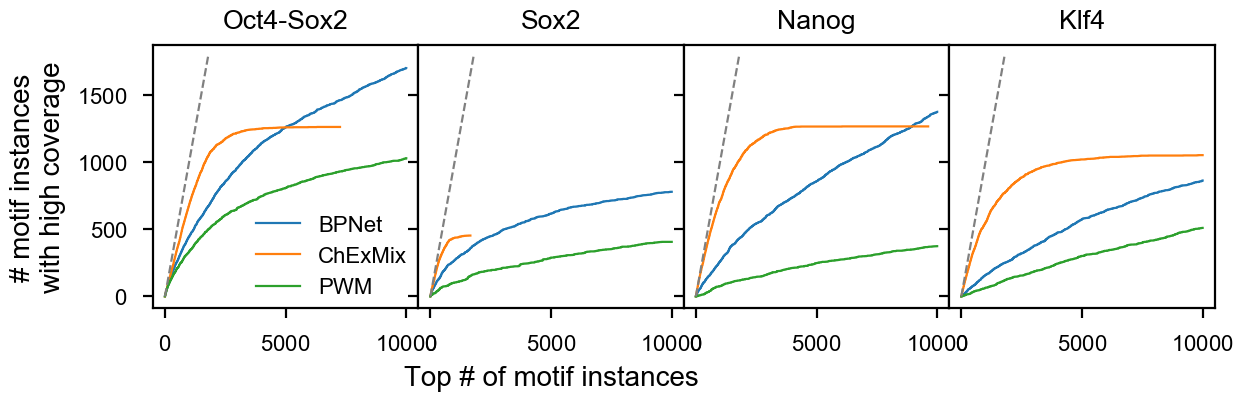

In [347]:
cutoff = 8
fig, axes = plt.subplots(1, len(main_motifs), figsize=get_figsize(1, 1/(1*len(main_motifs))), 
                         sharex=True, 
                         sharey=True, gridspec_kw=dict(wspace=0, hspace=0))
fig.subplots_adjust(wspace=.5)#, wspace=0)
max_val = 0
for i, (motif, res) in enumerate(motif_profile_counts):
    ax = axes[i]
    # top_n = min([len(x) for x in res.values()])
    top_n = 10000
    cutoff = thresholds[motif]
    for k,v in res.items():
        ax.plot(np.cumsum(v[:top_n] > cutoff), label=k)

    max_val = max(max_val, ax.get_ylim()[1])
    if i == 0:
        ax.set_ylabel("# motif instances\nwith high coverage")
    if i == 1:
        ax.set_xlabel("Top # of motif instances")
    if i == 0:
        leg = ax.legend(loc='lower right', framealpha=1, borderpad=0)
        leg.get_frame().set_linewidth(0.0)
    ax.set_title(motif)

for i, (motif, res) in enumerate(motif_profile_counts):
    axes[i].plot([0, max_val], [0, max_val], '--', color='grey', label=None)
fig.savefig(fdir / 'footprint-recall-curve.with-ChExMix.pdf')

### Spearman correlation

In [242]:
from gin_train.metrics import spearmanr

In [246]:
def corelate_cols(dfi, score, profile_cls, metric=spearmanr):
    df = dfi[(~dfi[score].isnull())]
    return metric(dfi[profile_cls], dfi[score])

In [247]:
motif_spearmanr = []
for motif in main_motifs:
    
    motif_spearmanr.append({
        "spearmanr": corelate_cols(dfis[(dfis.pattern_name == motif) & dfis.example_chrom.isin(test_chr)], 'imp_weighted', profile_mapping[motif]+ "/profile_max"),
        "motif_score": "BPNet",
        "motif": motif
    })
    motif_spearmanr.append({
        "spearmanr": corelate_cols(dfi_seq[(dfi_seq.motif == motif) & dfi_seq.example_chrom.isin(test_chr)], 'seq_match_score', profile_mapping[motif]+ "/profile_max"),
        "motif_score": "PWM",
        "motif": motif
    })
    
dfm_spearman = pd.DataFrame(motif_spearmanr)
dfm_spearman['motif'] = pd.Categorical(dfm_spearman['motif'], categories=list(motifs), ordered=True)

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.740152 x 1.693413936 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/profile-max-correlation.bar.pdf
  warn('Filename: {}'.format(filename))


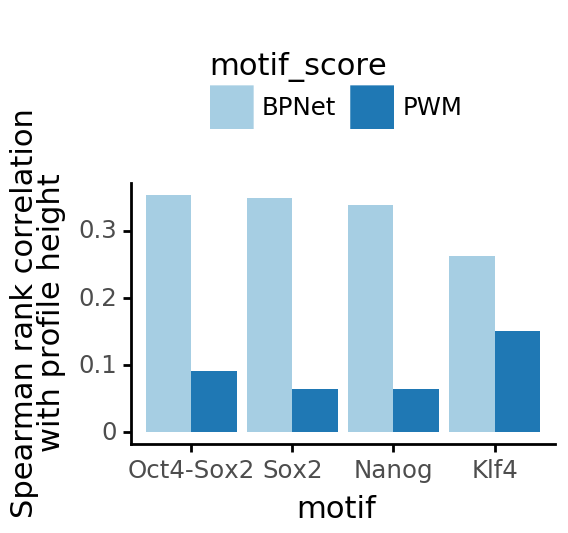

<ggplot: (8746853109554)>

In [249]:
plotnine.options.figure_size = get_figsize(.4)
fig = (ggplot(aes(x='motif', fill='motif_score', y='spearmanr'), dfm_spearman) + 
 geom_bar(stat='identity', position='dodge') + 
 theme_classic() + 
 scale_fill_brewer(type='qual', palette=3) + 
 theme(legend_position='top') + 
 ylab("Spearman rank correlation\nwith profile height")
)
fig.save(fdir / 'profile-max-correlation.bar.pdf')
fig

# Spacing analysis

In [86]:
from basepair.exp.chipnexus.spacing import get_motif_pairs, motif_pair_dfi

In [87]:
dfi_seq['pattern_name'] = dfi_seq.motif

In [89]:
motif_pair = ['Nanog', 'Nanog']
motif_pair_name = "<>".join(motif_pair)

In [94]:
threshold = 5
dfab = motif_pair_dfi(dfi_seq[dfi_seq.seq_match_score > threshold], motif_pair)
dfab['motif_pair'] = "<>".join(motif_pair)

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.055114 x 1.6440912 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/Nanog<>Nanog.PWM.threshold=5.pdf
  warn('Filename: {}'.format(filename))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


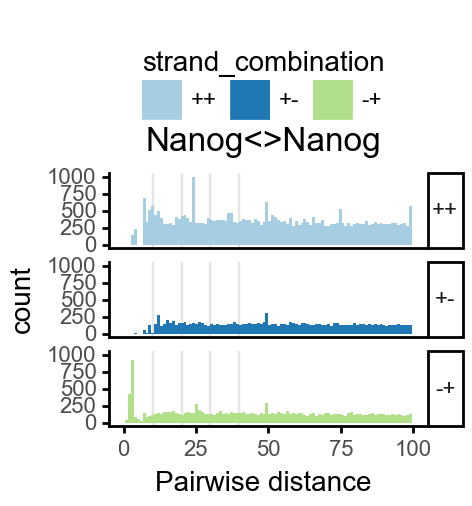

<ggplot: (8746850227576)>

In [95]:
plotnine.options.figure_size = get_figsize(.3, aspect=2/10*4)
max_dist = 100
fig = (ggplot(aes(x='center_diff', fill='strand_combination'), dfab[(dfab.center_diff <= max_dist) & (dfab.motif_pair.isin([motif_pair_name]))]) + 
 geom_vline(xintercept=10, alpha=0.1) + 
 geom_vline(xintercept=20, alpha=0.1) + 
 geom_vline(xintercept=30, alpha=0.1) + 
 geom_vline(xintercept=40, alpha=0.1) + 
 geom_histogram(bins=max_dist) + facet_grid("strand_combination~.") + 
 theme_classic(base_size=10, base_family='Arial') + 
 theme(strip_text = element_text(rotation=0), legend_position='top') + 
 xlim([0, max_dist]) + 
 xlab("Pairwise distance") +
 ggtitle(motif_pair_name) + 
 scale_fill_brewer(type='qual', palette=3))
fig.save(fdir / 'Nanog<>Nanog.PWM.threshold=5.pdf')
fig

In [97]:
threshold = 6
dfab = motif_pair_dfi(dfi_seq[dfi_seq.seq_match_score > threshold], motif_pair)
dfab['motif_pair'] = "<>".join(motif_pair)

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.055114 x 1.6440912 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/Nanog<>Nanog.PWM.threshold=6.pdf
  warn('Filename: {}'.format(filename))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


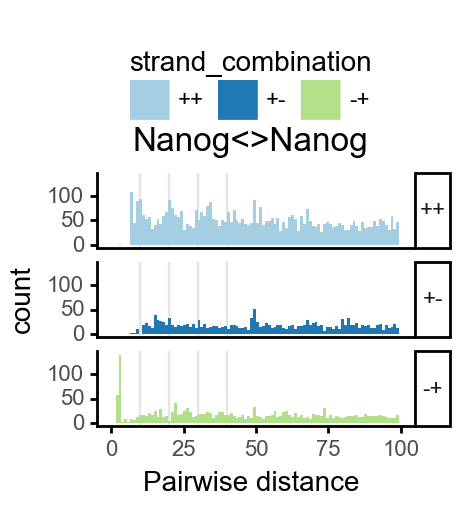

<ggplot: (8746850231630)>

In [98]:
plotnine.options.figure_size = get_figsize(.3, aspect=2/10*4)
max_dist = 100
fig = (ggplot(aes(x='center_diff', fill='strand_combination'), dfab[(dfab.center_diff <= max_dist) & (dfab.motif_pair.isin([motif_pair_name]))]) + 
 geom_vline(xintercept=10, alpha=0.1) + 
 geom_vline(xintercept=20, alpha=0.1) + 
 geom_vline(xintercept=30, alpha=0.1) + 
 geom_vline(xintercept=40, alpha=0.1) + 
 geom_histogram(bins=max_dist) + facet_grid("strand_combination~.") + 
 theme_classic(base_size=10, base_family='Arial') + 
 theme(strip_text = element_text(rotation=0), legend_position='top') + 
 xlim([0, max_dist]) + 
 xlab("Pairwise distance") +
 ggtitle(motif_pair_name) + 
 scale_fill_brewer(type='qual', palette=3))
fig.save(fdir / f'Nanog<>Nanog.PWM.threshold={threshold}.pdf')
fig

In [99]:
threshold = 7
dfab = motif_pair_dfi(dfi_seq[dfi_seq.seq_match_score > threshold], motif_pair)
dfab['motif_pair'] = "<>".join(motif_pair)

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.055114 x 1.6440912 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/Nanog<>Nanog.PWM.threshold=7.pdf
  warn('Filename: {}'.format(filename))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


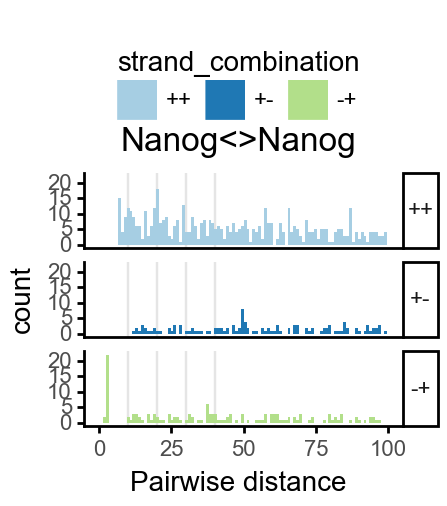

<ggplot: (8746850223473)>

In [100]:
plotnine.options.figure_size = get_figsize(.3, aspect=2/10*4)
max_dist = 100
fig = (ggplot(aes(x='center_diff', fill='strand_combination'), dfab[(dfab.center_diff <= max_dist) & (dfab.motif_pair.isin([motif_pair_name]))]) + 
 geom_vline(xintercept=10, alpha=0.1) + 
 geom_vline(xintercept=20, alpha=0.1) + 
 geom_vline(xintercept=30, alpha=0.1) + 
 geom_vline(xintercept=40, alpha=0.1) + 
 geom_histogram(bins=max_dist) + facet_grid("strand_combination~.") + 
 theme_classic(base_size=10, base_family='Arial') + 
 theme(strip_text = element_text(rotation=0), legend_position='top') + 
 xlim([0, max_dist]) + 
 xlab("Pairwise distance") +
 ggtitle(motif_pair_name) + 
 scale_fill_brewer(type='qual', palette=3))
fig.save(fdir / f'Nanog<>Nanog.PWM.threshold={threshold}.pdf')
fig

#### Very good matches

### Original figure

In [101]:
dfab = motif_pair_dfi(dfis.query('match_weighted_p > .2').query('imp_weighted_p > 0'), motif_pair)
dfab['motif_pair'] = "<>".join(motif_pair)

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.055114 x 1.6440912 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/Nanog<>Nanog.BPNet.default.pdf
  warn('Filename: {}'.format(filename))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


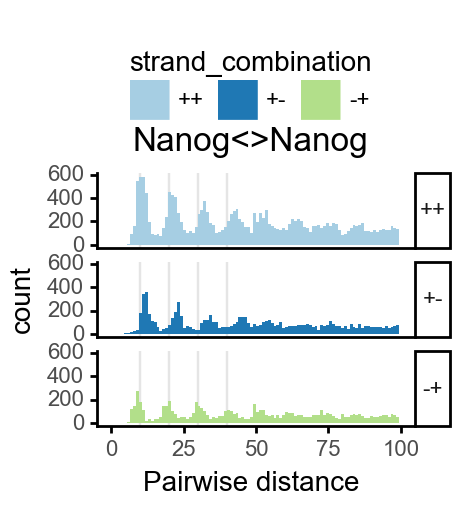

<ggplot: (-9223363290004483987)>

In [102]:
plotnine.options.figure_size = get_figsize(.3, aspect=2/10*4)
max_dist = 100
fig = (ggplot(aes(x='center_diff', fill='strand_combination'), dfab[(dfab.center_diff <= max_dist) & (dfab.motif_pair.isin([motif_pair_name]))]) + 
 geom_vline(xintercept=10, alpha=0.1) + 
 geom_vline(xintercept=20, alpha=0.1) + 
 geom_vline(xintercept=30, alpha=0.1) + 
 geom_vline(xintercept=40, alpha=0.1) + 
 geom_histogram(bins=max_dist) + facet_grid("strand_combination~.") + 
 theme_classic(base_size=10, base_family='Arial') + 
 theme(strip_text = element_text(rotation=0), legend_position='top') + 
 xlim([0, max_dist]) + 
 xlab("Pairwise distance") +
 ggtitle(motif_pair_name) + 
 scale_fill_brewer(type='qual', palette=3))
fig.save(fdir / 'Nanog<>Nanog.BPNet.default.pdf')
fig

### Chexmix

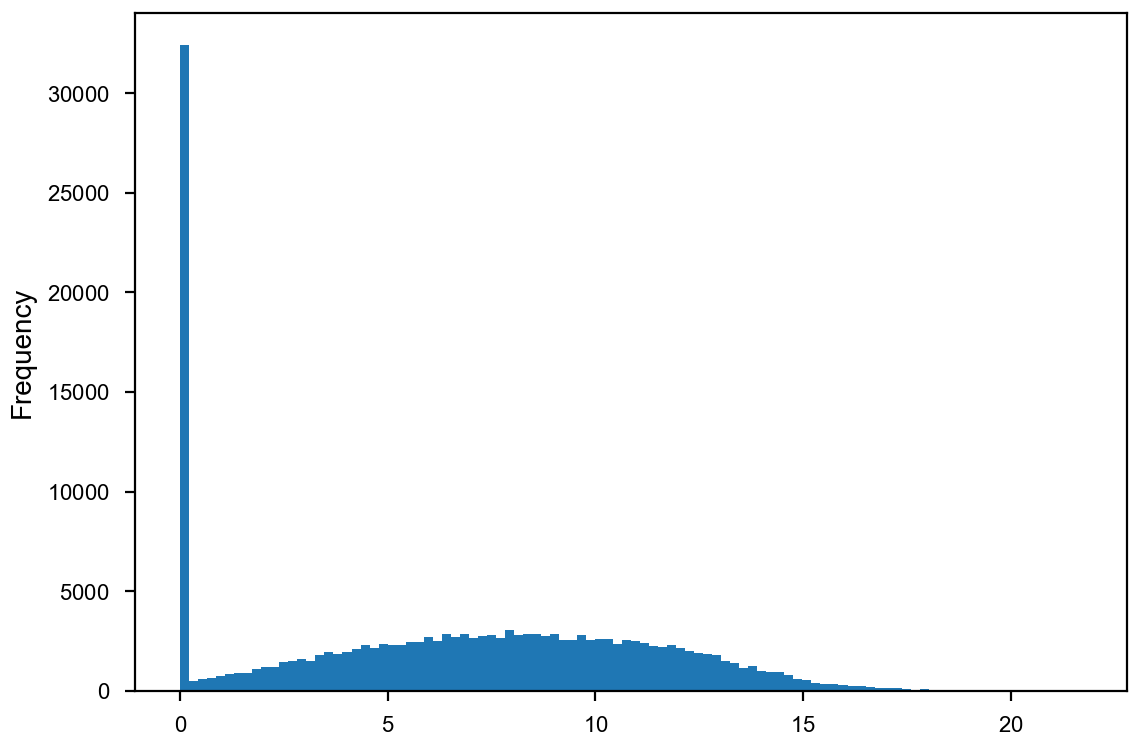

In [251]:
dfi_chexmix.motif_score.plot.hist(100);

In [103]:
dfab = motif_pair_dfi(dfi_chexmix, motif_pair)
dfab['motif_pair'] = "<>".join(motif_pair)

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.055114 x 1.6440912 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/Nanog<>Nanog.ChExMix.default.pdf
  warn('Filename: {}'.format(filename))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


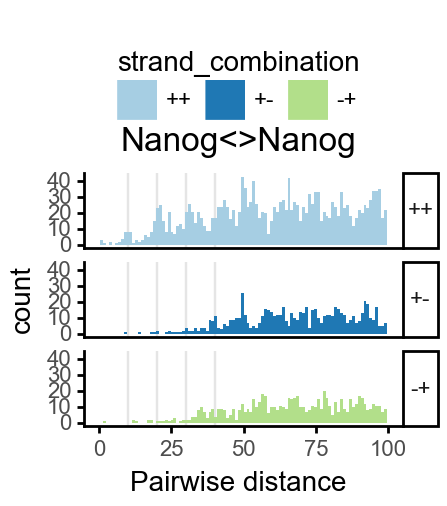

<ggplot: (-9223363290004543905)>

In [104]:
plotnine.options.figure_size = get_figsize(.3, aspect=2/10*4)
max_dist = 100
fig = (ggplot(aes(x='center_diff', fill='strand_combination'), dfab[(dfab.center_diff <= max_dist) & (dfab.motif_pair.isin([motif_pair_name]))]) + 
 geom_vline(xintercept=10, alpha=0.1) + 
 geom_vline(xintercept=20, alpha=0.1) + 
 geom_vline(xintercept=30, alpha=0.1) + 
 geom_vline(xintercept=40, alpha=0.1) + 
 geom_histogram(bins=max_dist) + facet_grid("strand_combination~.") + 
 theme_classic(base_size=10, base_family='Arial') + 
 theme(strip_text = element_text(rotation=0), legend_position='top') + 
 xlim([0, max_dist]) + 
 xlab("Pairwise distance") +
 ggtitle(motif_pair_name) + 
 scale_fill_brewer(type='qual', palette=3))
fig.save(fdir / 'Nanog<>Nanog.ChExMix.default.pdf')
fig

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.055114 x 1.6440912 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/Nanog<>Nanog.ChExMix.motif_score=1.pdf
  warn('Filename: {}'.format(filename))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


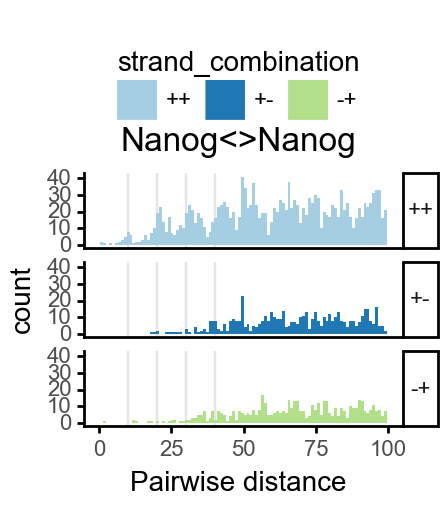

<ggplot: (-9223363290004516562)>

In [105]:
motif_score = 1
dfab = motif_pair_dfi(dfi_chexmix.query(f'motif_score > {motif_score}'), motif_pair)
dfab['motif_pair'] = "<>".join(motif_pair)

plotnine.options.figure_size = get_figsize(.3, aspect=2/10*4)
max_dist = 100
fig = (ggplot(aes(x='center_diff', fill='strand_combination'), dfab[(dfab.center_diff <= max_dist) & (dfab.motif_pair.isin([motif_pair_name]))]) + 
 geom_vline(xintercept=10, alpha=0.1) + 
 geom_vline(xintercept=20, alpha=0.1) + 
 geom_vline(xintercept=30, alpha=0.1) + 
 geom_vline(xintercept=40, alpha=0.1) + 
 geom_histogram(bins=max_dist) + facet_grid("strand_combination~.") + 
 theme_classic(base_size=10, base_family='Arial') + 
 theme(strip_text = element_text(rotation=0), legend_position='top') + 
 xlim([0, max_dist]) + 
 xlab("Pairwise distance") +
 ggtitle(motif_pair_name) + 
 scale_fill_brewer(type='qual', palette=3))
fig.save(fdir / f'Nanog<>Nanog.ChExMix.motif_score={motif_score}.pdf')
fig

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.055114 x 1.6440912 in image.
  from_inches(height, units), units))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /users/avsec/workspace/basepair/data/figures/method-comparison/Nanog<>Nanog.ChExMix.motif_score=5.pdf
  warn('Filename: {}'.format(filename))
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


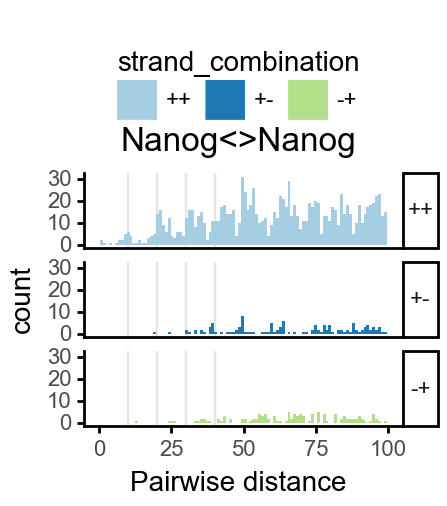

<ggplot: (8746853501311)>

In [106]:
motif_score = 5
dfab = motif_pair_dfi(dfi_chexmix.query(f'motif_score > {motif_score}'), motif_pair)
dfab['motif_pair'] = "<>".join(motif_pair)

plotnine.options.figure_size = get_figsize(.3, aspect=2/10*4)
max_dist = 100
fig = (ggplot(aes(x='center_diff', fill='strand_combination'), dfab[(dfab.center_diff <= max_dist) & (dfab.motif_pair.isin([motif_pair_name]))]) + 
 geom_vline(xintercept=10, alpha=0.1) + 
 geom_vline(xintercept=20, alpha=0.1) + 
 geom_vline(xintercept=30, alpha=0.1) + 
 geom_vline(xintercept=40, alpha=0.1) + 
 geom_histogram(bins=max_dist) + facet_grid("strand_combination~.") + 
 theme_classic(base_size=10, base_family='Arial') + 
 theme(strip_text = element_text(rotation=0), legend_position='top') + 
 xlim([0, max_dist]) + 
 xlab("Pairwise distance") +
 ggtitle(motif_pair_name) + 
 scale_fill_brewer(type='qual', palette=3))
fig.save(fdir / f'Nanog<>Nanog.ChExMix.motif_score={motif_score}.pdf')
fig

## Motif spacing

In [ ]:
from basepair.BPNet import BPNetSeqModel

In [40]:
# create_tf_session(0)

In [288]:
bpnet = BPNetSeqModel.from_mdir(model_dir)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


2019-07-13 14:00:47,770 [WARNING] From /users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:497: calling conv1d (from tensorflow.python.ops.nn_ops) with data_format=NHWC is deprecated and will be removed in a future version.
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


Instructions for updating:
Use the retry module or similar alternatives.


2019-07-13 14:01:01,067 [WARNING] From /users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:198: retry (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Use the retry module or similar alternatives.


In [ ]:
to_plot = [
    ("Nanog<>Nanog", "++", 10),
    ("Nanog<>Nanog", "++", 40),
]

for motif_pair, strand_combination, dist in to_plot:
#     dist = 10
#     strand_combination = '++'
#     motif_pair = 'Nanog<>Nanog'
    fig, axes = plt.subplots(2,1, 
                           gridspec_kw={'height_ratios':[1/7, 1/2]},
                           sharex=True,
                           figsize=get_figsize(.5, 1/7+1/2))
    dfp = (dfab
           .query(f'strand_combination=="{strand_combination}"')
           .query(f'motif_pair=="{motif_pair}"')
           .query(f'center_diff=={dist}'))
    intervals = create_intervals(dfp, ax=ax)
    seqs = fe(intervals)
    
    counts = ds.load_counts(intervals)
    ax = axes[0]
    plot_pwm(seqs.mean(0), ax=ax)
    ax.set_title(f"{motif_pair} {strand_combination}, dist = {dist}, ({len(dfp)})");
    
    
    cmap = plt.get_cmap("tab10")
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    ao = .7
    # plot aggregate profile
    agg_profile = counts[motif_pair.split("<>")[0]].mean(0)
    ax = axes[1]
    # fig, ax = plt.subplots(1, 1, figsize=get_figsize(.5, 1/2))
    ax.plot(agg_profile[:, 0], alpha=ao, label='Obs', color=cycle[0])
    ax.plot(-agg_profile[:, 1], alpha=ao, color=cycle[0])
    ax.set_ylabel("Counts")
    # ax.set_title("Observed")
    sns.despine(top=True, bottom=True, right=True)
    
    # params
    seqlen = seqs.shape[1]
    
    # Plot model
    agg_profile = counts[motif_pair.split("<>")[0]].mean(0)
    # fig, ax = plt.subplots(1, 1, figsize=get_figsize(.5, 1/2))
    seqs_1kb = fe([resize_interval(interval, 1000) for interval in intervals])
    preds = bpnet.predict(seqs_1kb)
    agg_preds = preds['Nanog'].mean(0)
    upstream_seq, downstream_seq = halve(seqlen)
    xs = slice(500-upstream_seq, 500+downstream_seq)
    a = agg_profile.sum() / agg_preds[xs].sum()
    ax.plot(a*agg_preds[xs, 0], label='BPNet', alpha=ao, color=cycle[1])
    ax.plot(-a*agg_preds[xs, 1], alpha=ao, color=cycle[1])
    ax.set_ylabel("Counts")
    # ax.set_title("BPNet")
    sns.despine(top=True, bottom=True, right=True)
    
    
    pshifted = p.rc().shift(-3).resize(seqlen).resize_profile(seqlen)
    upstream, downstream = halve(dist)
    double_profile = pshifted.shift(-upstream).profile['Nanog'] + pshifted.shift(downstream).profile['Nanog']
    # fig, ax = plt.subplots(1, 1, figsize=get_figsize(.5, 1/2))
    a = agg_profile.sum() / double_profile.sum()
    ax.plot(a*double_profile[:, 0], label='Mixture', alpha=ao, color=cycle[2])
    ax.plot(-a*double_profile[:, 1], alpha=ao, color=cycle[2])
    ax.set_ylabel("Counts")
    # ax.set_title("Mixture")
    sns.despine(top=True, bottom=True, right=True)
    ax.legend()#labels=['Obs', 'BPNet', 'Mixure'])
    fig.align_ylabels()
    
    fig.savefig(fdir_individual / f'{motif_pair}.{strand_combination}.{dist}.pwm+profile.pdf')